In [1]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [3]:
# Load the dataset
df = pd.read_csv("groceries - groceries (1).csv")

# View first few rows
df.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Show data shape and column names
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())

Dataset Shape: (9835, 33)
Columns: ['Item(s)', 'Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6', 'Item 7', 'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12', 'Item 13', 'Item 14', 'Item 15', 'Item 16', 'Item 17', 'Item 18', 'Item 19', 'Item 20', 'Item 21', 'Item 22', 'Item 23', 'Item 24', 'Item 25', 'Item 26', 'Item 27', 'Item 28', 'Item 29', 'Item 30', 'Item 31', 'Item 32']


In [5]:
# Check for missing values
print("Missing Values per Column:")
display(df.isnull().sum())

Missing Values per Column:


Item(s)       0
Item 1        0
Item 2     2159
Item 3     3802
Item 4     5101
Item 5     6106
Item 6     6961
Item 7     7606
Item 8     8151
Item 9     8589
Item 10    8939
Item 11    9185
Item 12    9367
Item 13    9484
Item 14    9562
Item 15    9639
Item 16    9694
Item 17    9740
Item 18    9769
Item 19    9783
Item 20    9797
Item 21    9806
Item 22    9817
Item 23    9821
Item 24    9827
Item 25    9828
Item 26    9828
Item 27    9829
Item 28    9830
Item 29    9831
Item 30    9834
Item 31    9834
Item 32    9834
dtype: int64

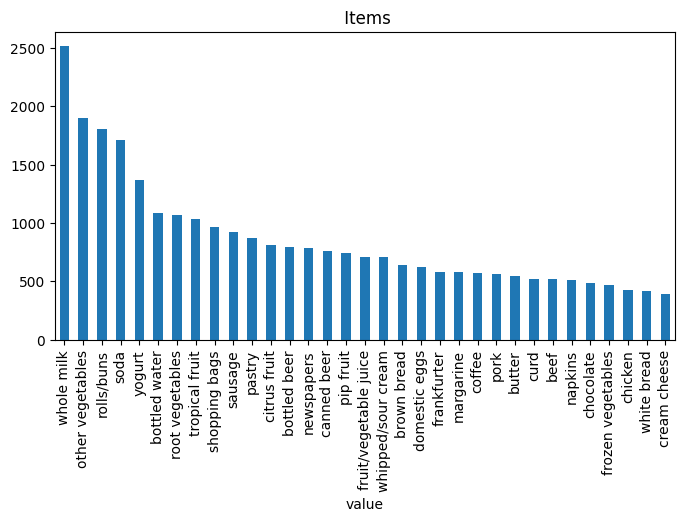

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


all_items = pd.melt(df.iloc[:, 1:]).value.dropna()  # Flatten and drop NaNs

pd.Series(all_items).value_counts().head(33).plot(kind='bar', figsize=(8,4), title=' Items')
plt.show()


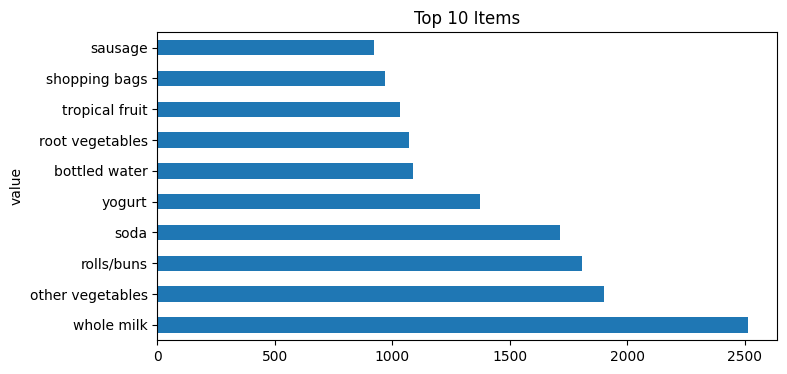

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


all_items = pd.melt(df.iloc[:, 1:]).value.dropna()  # Flatten and drop NaNs

pd.Series(all_items).value_counts().head(10).plot(kind='barh', figsize=(8,4), title='Top 10 Items')
plt.show()

In [8]:
# Step 2: Convert rows to list of items (ignoring NaN/empty cells)
transactions = df.drop('Item(s)', axis=1).values.tolist()
transactions = [[item for item in transaction if pd.notna(item)] for transaction in transactions]

In [9]:
# Step 3: Encode the transaction data
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

In [10]:
# Step 4: Apply Apriori to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.03, use_colnames=True)

In [11]:
# Step 5: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [12]:
# Step 6: Output top rules
print(rules.sort_values(by="lift", ascending=False).head(10))

             antecedents           consequents  antecedent support  \
7     (other vegetables)     (root vegetables)            0.193493   
6      (root vegetables)    (other vegetables)            0.108998   
18             (sausage)          (rolls/buns)            0.093950   
19          (rolls/buns)             (sausage)            0.183935   
9       (tropical fruit)    (other vegetables)            0.104931   
8     (other vegetables)      (tropical fruit)            0.193493   
30  (whipped/sour cream)          (whole milk)            0.071683   
31          (whole milk)  (whipped/sour cream)            0.255516   
26          (whole milk)     (root vegetables)            0.255516   
27     (root vegetables)          (whole milk)            0.108998   

    consequent support   support  confidence      lift  representativity  \
7             0.108998  0.047382    0.244877  2.246605               1.0   
6             0.193493  0.047382    0.434701  2.246605               1.0   
1